In [1]:
import pandas as pd
from spotipy import Spotify
from spotipy.oauth2 import SpotifyClientCredentials
import plotnine as pn
#from plotnine import ggplot, aes, geom_bar, labs, theme_minimal, theme, element_text

In [ ]:
#https://open.spotify.com/playlist/1g9lewkVhDeGmjBc19nAuV?si=0a138639e68946ab

In [14]:
# Spotify API credentials (replace with your own)
CLIENT_ID = "07112066deaf496b8861f4a96a61bcf8"
CLIENT_SECRET = "082cc9f4ab114a9cac6042dcc72db089"

# Initialize Spotify client
sp = Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET))


In [18]:
playlist = sp.playlist("1g9lewkVhDeGmjBc19nAuV")
print(f"Playlist Name: {playlist['name']}")
print(f"Total Tracks: {playlist['tracks']['total']}")

Playlist Name: My Playlist #11
Total Tracks: 24


In [19]:
# Playlist ID (replace with your desired playlist ID)
playlist_id = "1g9lewkVhDeGmjBc19nAuV"

# Fetch all tracks in the playlist
def get_playlist_tracks(playlist_id):
    tracks = []
    offset = 0
    while True:
        response = sp.playlist_items(
            playlist_id,
            offset=offset,
            fields="items.track.name,items.track.artists,total",
            additional_types=["track"]
        )
        tracks.extend(response['items'])
        offset += len(response['items'])
        if len(response['items']) == 0:
            break
    return tracks

# Extract artist data
def count_artists(tracks):
    artist_counts = {}
    for item in tracks:
        track = item['track']
        if track:  # Ensure track data is present
            for artist in track['artists']:
                artist_name = artist['name']
                artist_counts[artist_name] = artist_counts.get(artist_name, 0) + 1
    return artist_counts

# Fetch and count artists
tracks = get_playlist_tracks(playlist_id)
artist_counts = count_artists(tracks)

# Convert to a pandas DataFrame
df = pd.DataFrame(list(artist_counts.items()), columns=["Artist", "Count"])

# Sort by count in descending order
#df = df.sort_values(by="Count", ascending=False)

# Display the table
print(df)

              Artist  Count
0  Sabrina Carpenter      5
1      Chappell Roan      6
2       Taylor Swift      2
3         Charli xcx      1
4        Morgan Clae     10


/tmp/ipykernel_2117/3780108934.py:13: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


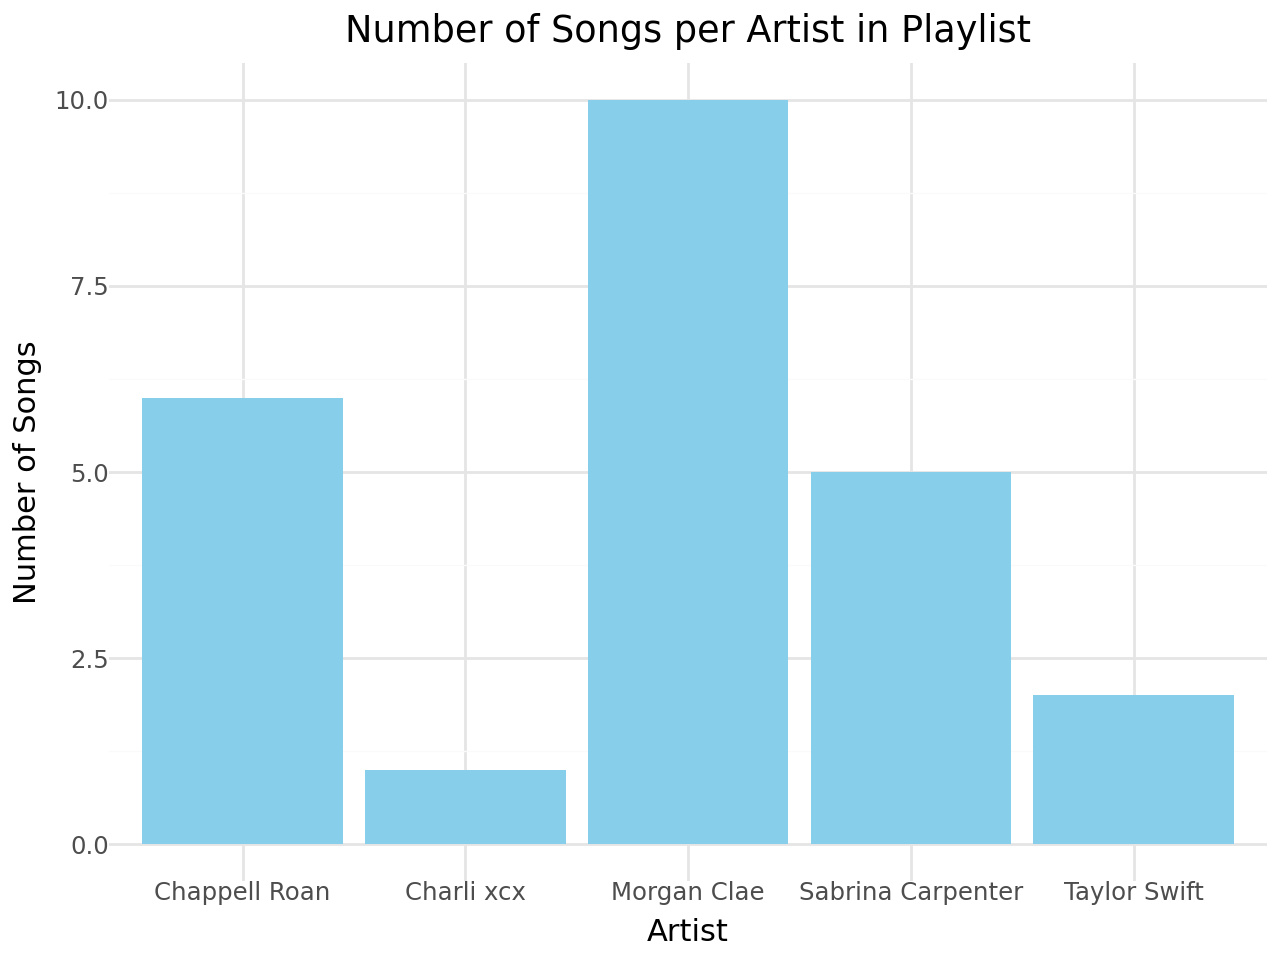

In [21]:
bar_plot = (
    pn.ggplot(df, pn.aes(x='Artist', y='Count')) +
    pn.geom_bar(stat='identity', fill='skyblue') +
    pn.labs(
        title="Number of Songs per Artist in Playlist",
        x="Artist",
        y="Number of Songs"
    ) +
    pn.theme_minimal() 
)

# Print the plot
print(bar_plot)

/tmp/ipykernel_2117/52917156.py:56: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


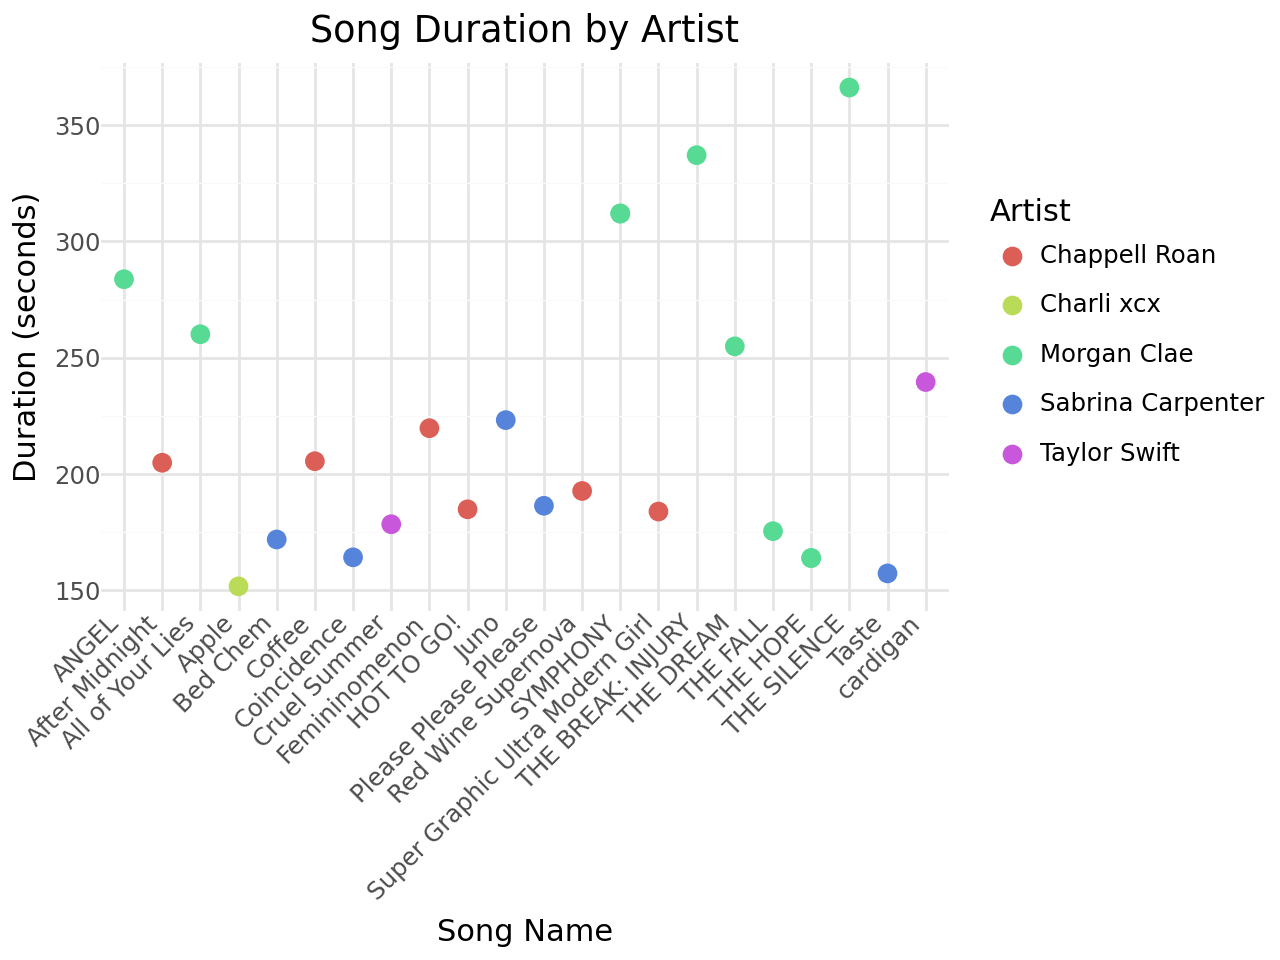

In [24]:
# Fetch all tracks in the playlist
def playlist_tracks_with_durations(playlist_id):
    tracks = []
    offset = 0
    while True:
        response = sp.playlist_items(
            playlist_id,
            offset=offset,
            fields="items.track.name,items.track.artists,items.track.duration_ms,total",
            additional_types=["track"]
        )
        tracks.extend(response['items'])
        offset += len(response['items'])
        if len(response['items']) == 0:
            break
    return tracks

# Extract song, artist, and duration data
def song_artist_duration_data(tracks):
    data = []
    for item in tracks:
        track = item['track']
        if track:  # Ensure track data is present
            song_name = track['name']
            duration_ms = track['duration_ms']  # Duration in milliseconds
            duration_sec = duration_ms / 1000  # Convert to seconds
            for artist in track['artists']:
                artist_name = artist['name']
                data.append({'Artist': artist_name, 'Song': song_name, 'Duration (s)': duration_sec})
    return data

# Fetch and organize data
tracks = playlist_tracks_with_durations(playlist_id)
artist_duration_data = song_artist_duration_data(tracks)

# Convert to a pandas DataFrame
df = pd.DataFrame(artist_duration_data)

# Create a scatter plot using plotnine
scatter_plot = (
    pn.ggplot(df, pn.aes(x='Song', y='Duration (s)', color='Artist')) +
    pn.geom_point(size=3) +
    pn.labs(
        title="Song Duration by Artist",
        x="Song Name",
        y="Duration (seconds)",
        color="Artist"
    ) +
    pn.theme_minimal() +
    pn.theme(
        axis_text_x=pn.element_text(rotation=45, hjust=1)  # Rotate x-axis labels for better readability
    )
)

# Print the plot
print(scatter_plot)
